# Perform clustering of the iris dataset based on all variables using Gaussian mixture models. Use PCA to visualize clusters.

In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

## Dataset: iris

In [10]:
iris = pd.read_csv("/content/iris.csv")

In [11]:
iris.shape

(150, 5)

In [12]:
iris.describe()

,sepal_length,sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Seperate the dataset based on independant and dependant columns.

In [13]:
x= iris.iloc[:,:4]
y= iris.iloc[:,-1] 

## Standardizing Dataset using sklearn

In [14]:
sc =StandardScaler()
sc.fit(x)
std_array =sc.transform(x)
X = pd.DataFrame(std_array,columns = x.columns)

## Gaussian Mixture model

In [15]:
cluster =GaussianMixture(n_components=3)
cluster.fit(X)
y_pred =cluster.predict(X)
score = adjusted_rand_score(y,y_pred)
score

0.9038742317748124

## Using PCA to visualize data

In [17]:
from sklearn.decomposition import PCA

pca =PCA(n_components=2)
pca_array =pca.fit_transform(iris.drop(['Species'], axis=1))
pca_df =pd.DataFrame(pca_array,columns=["PC1","PC2"])
pca_df.head()

,PC1,PC2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [22]:
col_code = {0:"yellow",1:"red",2:"black"}
label = {0:"setosa",1:"versicolor",2:"virginica"}

pca_df["labels"]= pd.DataFrame(y_pred)
groups = pca_df.groupby('labels')

# Grouping instances based on species
groups.mean()

,PC1,PC2
labels,,
0,2.031520,0.028510
1,-2.640841,0.190520
2,0.451298,-0.246535


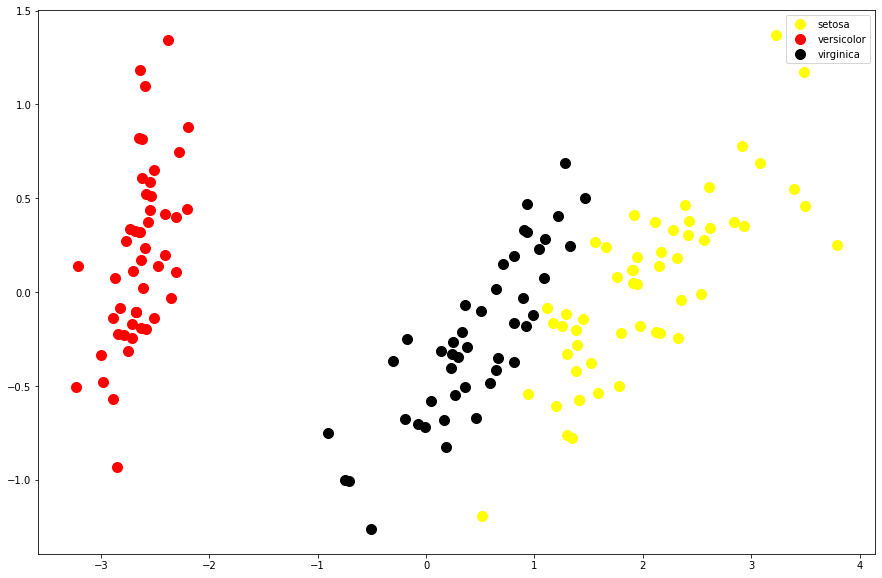

In [23]:
fig, ax =plt.subplots(1,1,figsize =(15,10))
for name, group in groups:
    ax.plot(group.PC1,group.PC2,color =col_code[name],label =label[name],marker='o',linestyle='',ms=10)
ax.legend()
plt.show()